# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [13]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


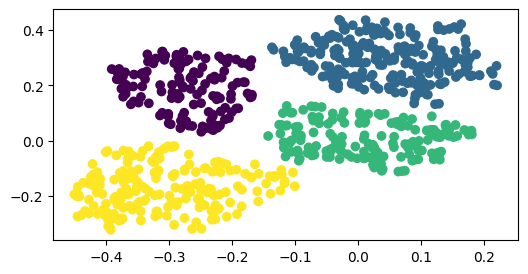

In [14]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [15]:
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  indices_medoides = np.random.choice(Dx.shape[0], K, replace=False)
  cDx = Dx[indices_medoides]
  return cDx

Los centros iniciales elegidos aleatoriamente son:
[[-0.0599128  0.311869 ]
 [-0.248958  -0.17941  ]
 [-0.283077   0.158414 ]
 [ 0.0276263  0.293338 ]]


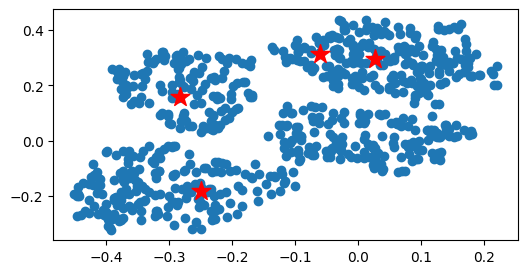

In [16]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [17]:
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

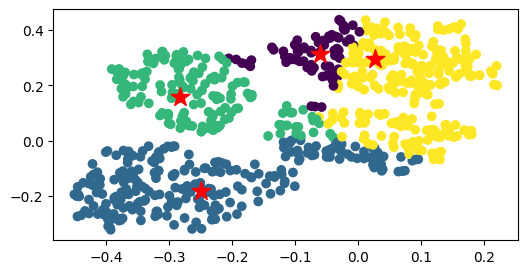

In [18]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [19]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = np.where(Dyp == k)[0]

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.

      mat = matriz_distancias(Dx[indices_elementos_k], distancia_euclidiana)

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).

      ic =np.where(Dyp==k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] = Dx[ic,:]
  return cDx

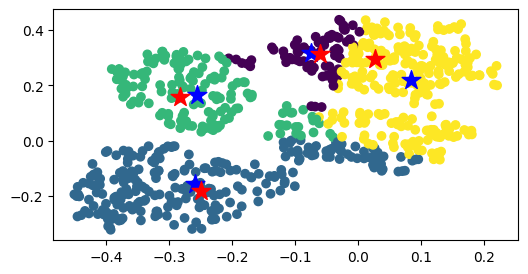

In [20]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [21]:
def MyKMedoide(Dx, K):
  cDx = paso1_elije_medoides(K, Dx)
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx =  paso3_actualiza_medoides(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

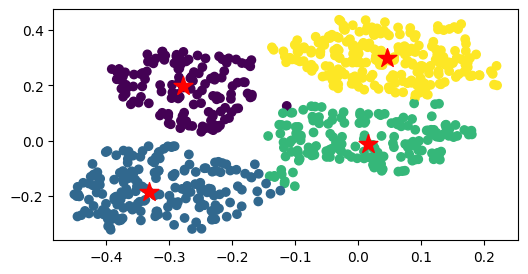

In [22]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


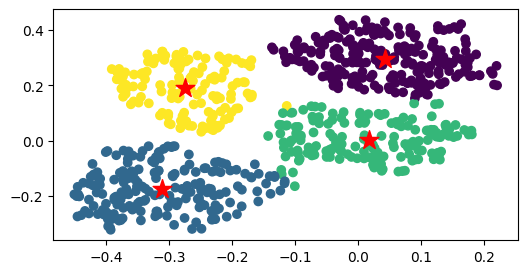

In [23]:
from sklearn.cluster import KMeans

modelo = KMeans(4, random_state=0, n_init='auto')
modelo.fit(Dx)
Dyp_sk =  modelo.labels_
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [24]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
## P10. Tu código aquí ##
# Calcular metricas K-medoids
print('K-Medoids Metrics:')
print(f'  Adjusted Rand Index: {adjusted_rand_score(Dy, Dyp):.4f}')
print(f'  Normalized Mutual Information: {normalized_mutual_info_score(Dy, Dyp):.4f}')
print(f'  Homogeneity: {homogeneity_score(Dy, Dyp):.4f}')
print(f'  Completeness: {completeness_score(Dy, Dyp):.4f}')
print(f'  V-measure: {v_measure_score(Dy, Dyp):.4f}')

# Calcular metricas K-Means++
print('\nK-Means++ Metrics:')
print(f'  Adjusted Rand Index: {adjusted_rand_score(Dy, Dyp_sk):.4f}')
print(f'  Normalized Mutual Information: {normalized_mutual_info_score(Dy, Dyp_sk):.4f}')
print(f'  Homogeneity: {homogeneity_score(Dy, Dyp_sk):.4f}')
print(f'  Completeness: {completeness_score(Dy, Dyp_sk):.4f}')
print(f'  V-measure: {v_measure_score(Dy, Dyp_sk):.4f}')

K-Medoids Metrics:
  Adjusted Rand Index: 0.9561
  Normalized Mutual Information: 0.9444
  Homogeneity: 0.9452
  Completeness: 0.9436
  V-measure: 0.9444

K-Means++ Metrics:
  Adjusted Rand Index: 0.9725
  Normalized Mutual Information: 0.9606
  Homogeneity: 0.9613
  Completeness: 0.9600
  V-measure: 0.9606


### Análisis de Métricas y Conclusión

Al comparar las métricas de clustering para K-medoids y K-Means++ con los datos proporcionados, observamos lo siguiente:

**Conclusión:**

Según todas las métricas evaluadas, **K-Means++ ha demostrado un rendimiento ligeramente superior** en la agrupación de este dataset en comparación con el algoritmo K-medoids implementado. Todos los valores de las métricas para K-Means++ son más altos que los de K-medoids, lo que indica que K-Means++ ha logrado una agrupación más precisa y coherente con las etiquetas verdaderas (`Dy`) en este caso. Esto sugiere que, para este dataset específico, la inicialización de K-Means++ y su método de actualización de centros fueron más efectivos.

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


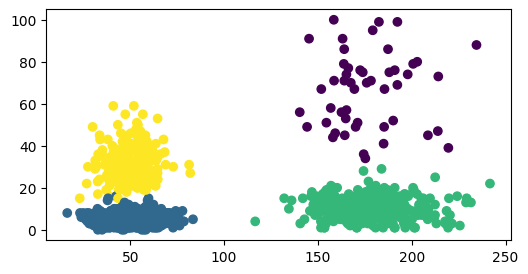

In [25]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

K-Means++ aplicado al nuevo dataset. Etiquetas y centros obtenidos.
Visualización de K-Means++ en el nuevo dataset:


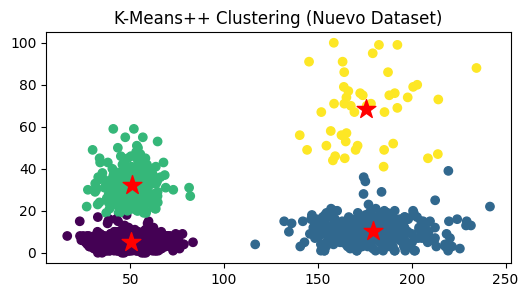

In [26]:
 ## aplica kMeans ++
 ## P11. Tu código aquí ##
modelo_sk_new = KMeans(n_clusters=4, random_state=0, n_init='auto')
modelo_sk_new.fit(Dx)
Dyp_sk_new = modelo_sk_new.labels_
cDx_sk_new = modelo_sk_new.cluster_centers_

print('K-Means++ aplicado al nuevo dataset. Etiquetas y centros obtenidos.')
print('Visualización de K-Means++ en el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_sk_new)
ax.scatter(cDx_sk_new[:,0], cDx_sk_new[:,1], marker='*', s=200, c='r')
ax.set_title('K-Means++ Clustering (Nuevo Dataset)')
plt.show()

In [27]:
def MyKMeans(Dx, K):
  cDx = paso1_elije_centros(K, Dx)
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni




K-Medoides en el nuevo dataset:


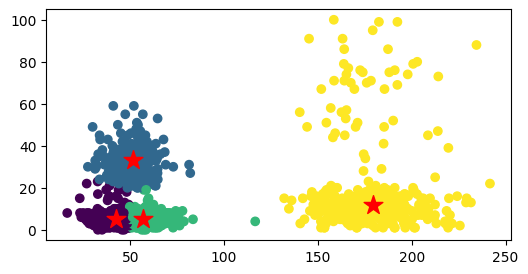

In [28]:
cDx_new, Dyp_new = MyKMedoide(Dx, K)

print('K-Medoides en el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_new)
ax.scatter(cDx_new[:,0],cDx_new[:,1], marker='*', s=200, c='r')

Para el primer dataset analizado, K-Means++ demostró un rendimiento ligeramente superior en comparación con K-medoids, obteniendo valores más altos en todas las métricas de clustering evaluadas.

# 🚀 ¡TALLER FINALIZADO!"